In [57]:
import numpy as np
import matplotlib.pyplot as plt

## Get Energy of H2 molecule from samples

In [9]:
folder = "H2_data/"
filename_wvfct = "R_0.2_psi.txt"
filename_samples = "R_0.2_samples.txt"

samples = np.loadtxt(folder + filename_samples)
wvfct = np.loadtxt(folder + filename_wvfct)

### Load coefficients

The coefficients are from https://arxiv.org/pdf/1512.06860.pdf from the appendix

In [50]:
coeff = np.loadtxt("H2_coefficients.txt")

### Find frequency / probability of all measurements

In [26]:
basis = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])

def find_sample_frequency(samples):
    freq = []
    for b in basis:
        l = len(np.where((samples == b).all(axis=1))[0])
        freq.append(l)
    return np.array(freq) / samples.shape[0]

freq = find_sample_frequency(samples)

### Define all operators of Hamiltonian

In [74]:
def one(freq):
    return freq.sum()

def Z0(freq):
    return freq[:2].sum() - freq[2:4].sum()

def Z1(freq):
    return freq[[0,2]].sum() - freq[[1,3]].sum()

def Z0Z1(freq):
    return freq[[0,3]].sum() - freq[[1,2]].sum()

def X0X1(freq):
    return 2*np.sqrt(freq)[[1,2]].prod() + 2*np.sqrt(freq)[[0,3]].prod()

def Y0Y1(freq):
    return 2*np.sqrt(freq)[[1,2]].prod() - 2*np.sqrt(freq)[[0,3]].prod() # Y0Y1 gives minus sign to [00] and [11]

### Define Hamiltonian

In [71]:
def energy(samples, coeff):
    f = find_sample_frequency(samples)
    c1, c2, c3, c4, c5, c6 = coeff[1:-1]
    return c1*one(f) + c2*Z0(f) + c3*Z1(f) + c4*Z0Z1(f) + c5*X0X1(f) - c5*Y0Y1(f)

In [72]:
energy(samples, coeff[0])

1.9376684400000006

### Get all the energies for different R

0.1564557999999996
-0.31040516000000007
-0.59886426
-0.7829793599999997
-0.90604868
-0.9871539200000001
-1.0412864000000002
-1.0764598199999997
-1.09477854
-1.10485816
-1.1084201
-1.1043668
-1.0945216800000002
-1.08654736
-1.07047836
-1.056978
-1.04226548
-1.02404594
-1.0060718
-0.9843746
-0.96853254
-0.9458456399999999
-0.9266827599999998
-0.907448
-0.8893622999999999
-0.87084496
-0.8515612
-0.8364150399999999
-0.82116704
-0.8041076
-0.79460412
-0.77643098
-0.76447374
-0.75122224
-0.7407156
-0.7304936
-0.72234428
-0.71692124
-0.7084005600000001
-0.6999503
-0.6946763999999999
-0.6882368
-0.6841991999999999
-0.67865144
-0.6763679599999999
-0.6720788799999999
-0.6683117599999999
-0.66395792
-0.6617004
-0.65830368
-0.6563190000000001
-0.65349784
-0.65170472


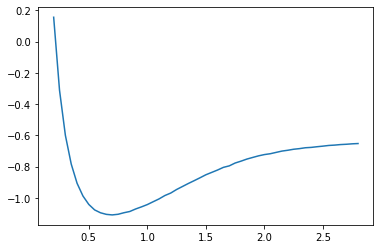

In [73]:
energies = []
x_axis = []
for i in range(53):
    R = coeff[i][0]
    try: 
        filename_samples = "R_{}_samples.txt".format(R)
        samples = np.loadtxt(folder + filename_samples)
        E = energy(samples, coeff[i])
        energies.append(E)
        x_axis.append(R)
        print(E)
    except:
        print("No sample file for R = {}".format(R))
        
plt.plot(x_axis, energies)
plt.show()

## Next step: Train RBM on this data and sample from it


